In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [3]:
countries_df = pd.read_csv("country_relationships.csv")
countries_df.head()

,source,target
0,France,Austria
1,Austria,Hungary
2,France,Austria
3,Austria,Hungary
4,Hungary,Russia


In [6]:
#creating network objective
G = nx.from_pandas_edgelist(
    countries_df,
    source="source",
    target="target",
    create_using=nx.Graph())

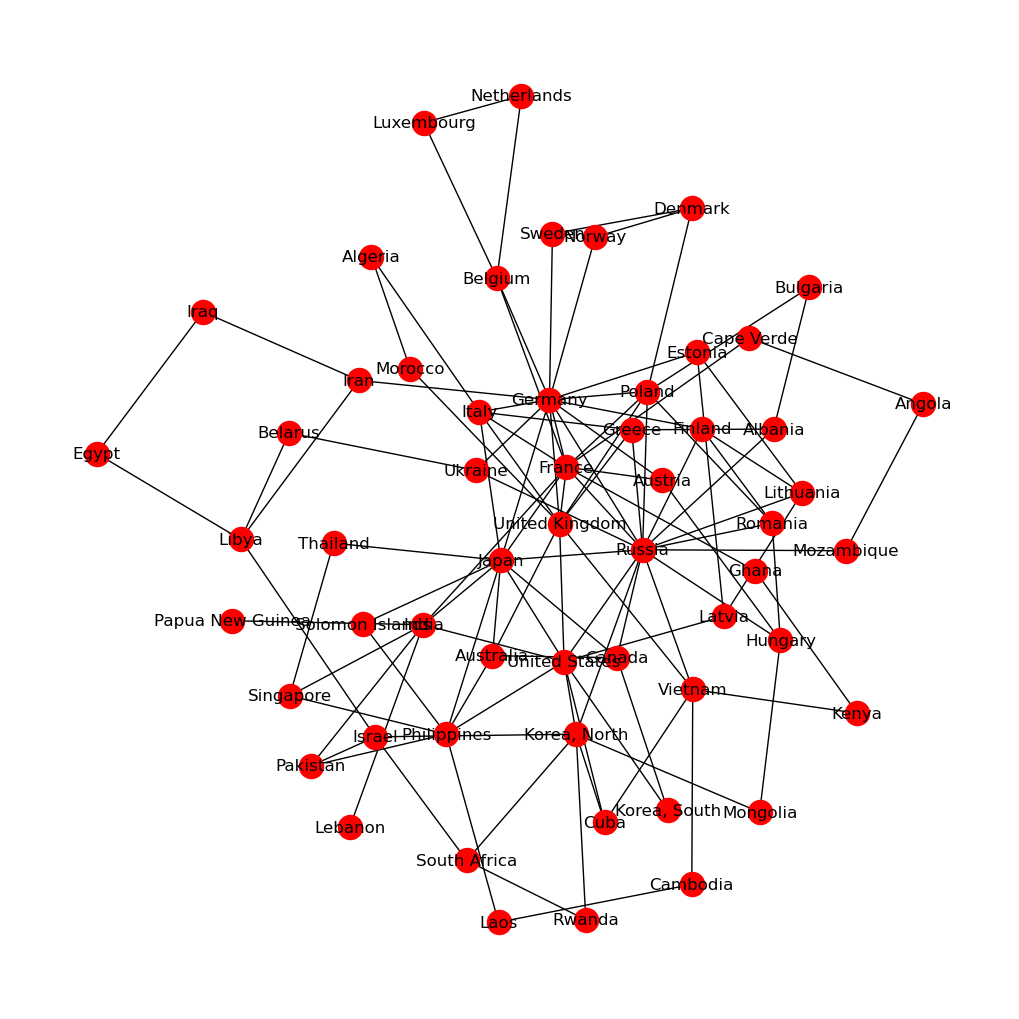

In [7]:
#Static Graph
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues)
plt.show()

In [8]:
#Interactive graph
net = Network(notebook=True, width="900px", height="800px", bgcolor="#222222", font_color="white")
net.from_nx(G)
net.show_buttons(filter_="physics")
net.repulsion()
net.show("countries_network.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [12]:
#Leiden algorithm to detect any communities
from cdlib import algorithms
coms = algorithms.leiden(G)
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}

In [13]:
nx.set_node_attributes(G, dict_com, "group")

com_net = Network(notebook=True, width="1300px", height="700px", bgcolor="#222222", font_color="white")
com_net.from_nx(G)
com_net.show_buttons(filter_="physics")
com_net.repulsion()
com_net.show("countries_communities.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [14]:
#Degree Centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.19642857142857142,
 'Austria': 0.05357142857142857,
 'Hungary': 0.07142857142857142,
 'Russia': 0.2857142857142857,
 'Germany': 0.25,
 'Ukraine': 0.05357142857142857,
 'Italy': 0.10714285714285714,
 'United Kingdom': 0.1607142857142857,
 'Poland': 0.125,
 'Estonia': 0.05357142857142857,
 'Latvia': 0.05357142857142857,
 'Lithuania': 0.07142857142857142,
 'Finland': 0.07142857142857142,
 'Denmark': 0.05357142857142857,
 'Norway': 0.03571428571428571,
 'Sweden': 0.03571428571428571,
 'Belgium': 0.07142857142857142,
 'Netherlands': 0.03571428571428571,
 'Luxembourg': 0.03571428571428571,
 'Greece': 0.07142857142857142,
 'Albania': 0.05357142857142857,
 'Belarus': 0.03571428571428571,
 'Libya': 0.07142857142857142,
 'Egypt': 0.03571428571428571,
 'Iraq': 0.03571428571428571,
 'Iran': 0.05357142857142857,
 'United States': 0.1607142857142857,
 'Japan': 0.19642857142857142,
 'Morocco': 0.03571428571428571,
 'Algeria': 0.03571428571428571,
 'Thailand': 0.03571428571428571,
 'Singa

In [15]:
#closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_dict

{'France': 0.48695652173913045,
 'Austria': 0.3660130718954248,
 'Hungary': 0.3522012578616352,
 'Russia': 0.5137614678899083,
 'Germany': 0.49557522123893805,
 'Ukraine': 0.3888888888888889,
 'Italy': 0.4028776978417266,
 'United Kingdom': 0.448,
 'Poland': 0.42424242424242425,
 'Estonia': 0.34782608695652173,
 'Latvia': 0.33532934131736525,
 'Lithuania': 0.3522012578616352,
 'Finland': 0.38620689655172413,
 'Denmark': 0.30601092896174864,
 'Norway': 0.3373493975903614,
 'Sweden': 0.3373493975903614,
 'Belgium': 0.36363636363636365,
 'Netherlands': 0.2692307692307692,
 'Luxembourg': 0.2692307692307692,
 'Greece': 0.3660130718954248,
 'Albania': 0.35668789808917195,
 'Belarus': 0.2978723404255319,
 'Libya': 0.3027027027027027,
 'Egypt': 0.23529411764705882,
 'Iraq': 0.26666666666666666,
 'Iran': 0.35668789808917195,
 'United States': 0.4444444444444444,
 'Japan': 0.4745762711864407,
 'Morocco': 0.3146067415730337,
 'Algeria': 0.2916666666666667,
 'Thailand': 0.32748538011695905,
 'Sing

In [16]:
#betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

{'France': 0.18098721179508043,
 'Austria': 0.008042334649477506,
 'Hungary': 0.01609583343827041,
 'Russia': 0.3123526974892521,
 'Germany': 0.2651100412616837,
 'Ukraine': 0.03243300350443207,
 'Italy': 0.03805467980792657,
 'United Kingdom': 0.08745419729663427,
 'Poland': 0.06213686025374337,
 'Estonia': 0.010685425685425682,
 'Latvia': 0.006681096681096682,
 'Lithuania': 0.008777056277056276,
 'Finland': 0.004962121212121211,
 'Denmark': 0.001948051948051948,
 'Norway': 0.0032846320346320342,
 'Sweden': 0.0032846320346320342,
 'Belgium': 0.07012987012987013,
 'Netherlands': 0.0,
 'Luxembourg': 0.0,
 'Greece': 0.005998191923516599,
 'Albania': 0.007184671389216843,
 'Belarus': 0.004813955885384457,
 'Libya': 0.03846580367684265,
 'Egypt': 0.0023106060606060607,
 'Iraq': 0.01023577612863327,
 'Iran': 0.07267885253274863,
 'United States': 0.11817147891154765,
 'Japan': 0.14774897233739862,
 'Morocco': 0.003067650242974918,
 'Algeria': 0.0006222943722943723,
 'Thailand': 0.0027254293

<AxesSubplot:title={'center':'Degree Centrality'}>

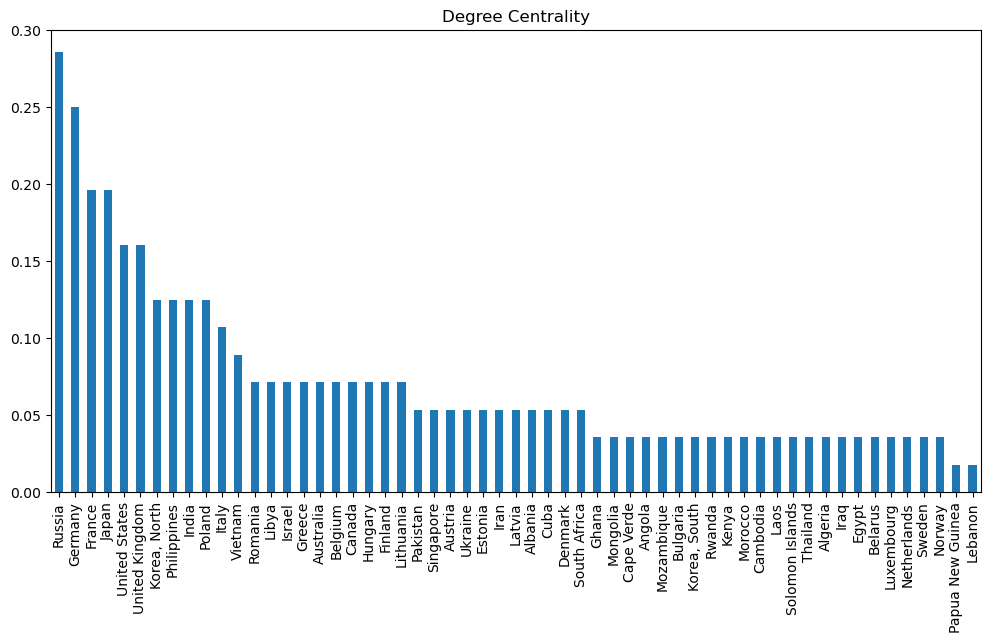

In [21]:
#Visualization for degree
degree_df = pd.DataFrame.from_dict(degree_dict, orient="index", columns=["degree"])
degree_df.sort_values("degree", ascending=False).plot(kind="bar", figsize=(12,6), legend=False, title="Degree Centrality")

<AxesSubplot:title={'center':'Closeness Centrality'}>

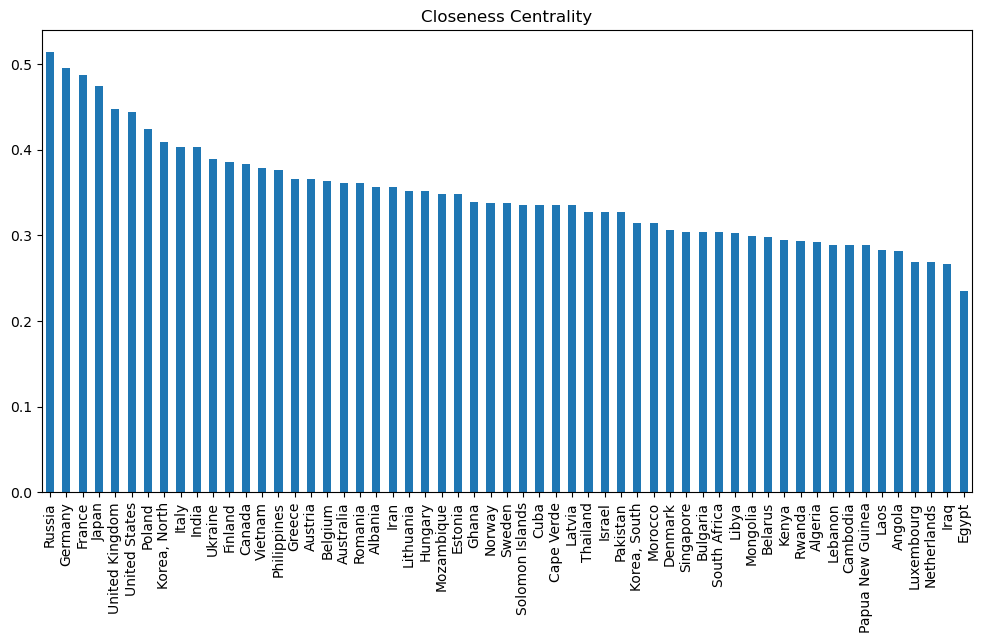

In [20]:
#Visualization for Closeness
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient="index", columns=["closeness"])
closeness_df.sort_values("closeness", ascending=False).plot(kind="bar", figsize=(12,6), legend=False, title="Closeness Centrality")

<AxesSubplot:title={'center':'Betweenness Centrality'}>

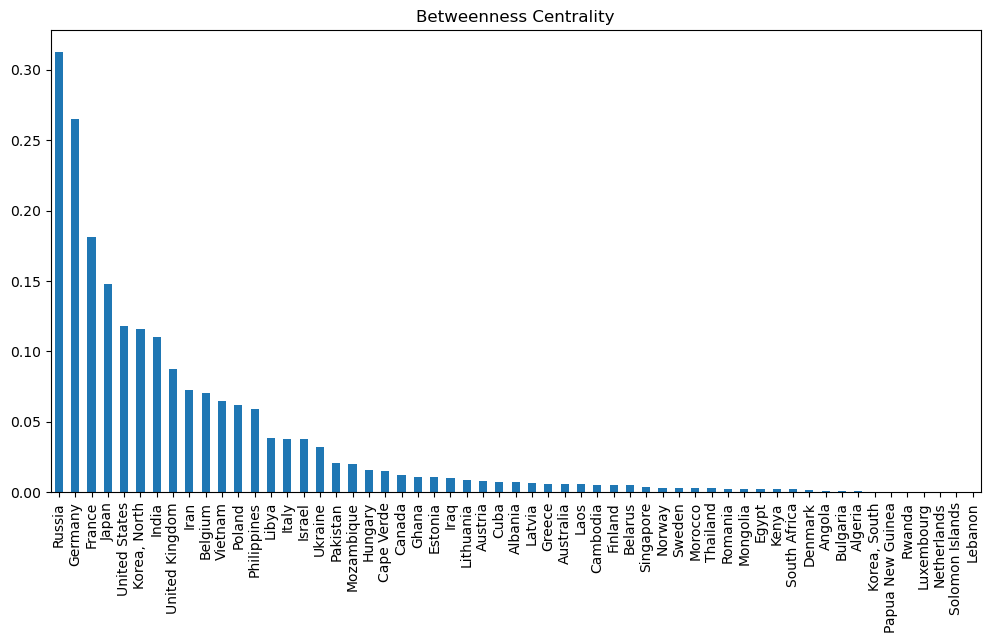

In [19]:
#Visualization for betweenness
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient="index", columns=["betweenness"])
betweenness_df.sort_values("betweenness", ascending=False).plot(kind="bar", figsize=(12,6), legend=False, title="Betweenness Centrality")